In [230]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [231]:
connect_db = sqlite3.connect('../data/checking-logs-test-control.sqlite')
query = '''
        select timestamp from checker where uid like 'user_%'
        '''
df = pd.io.sql.read_sql(query, connect_db, parse_dates=['timestamp'])
df.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [232]:
#  date, am, pm, target
df['date'] = df.timestamp.dt.date
df['hour'] = df.timestamp.dt.hour
df['target'] = df.timestamp.dt.dayofweek
df.loc[df.target < 5, 'target'] = 'working_day'
df.loc[df.target != 'working_day', 'target'] = 'weekend'
df.loc[df.hour < 12, 'hour'] = 'am'
df.loc[df.hour != 'am', 'hour'] = 'pm'
df.drop('timestamp', inplace=True, axis=1)
df.head()

,date,hour,target
0,2020-04-17,am,working_day
1,2020-04-17,am,working_day
2,2020-04-17,am,working_day
3,2020-04-17,am,working_day
4,2020-04-17,am,working_day


In [233]:
ds = df
ds = ds.groupby(by = ['date','hour']).count()['target'].reset_index()
pivot_table = pd.pivot(ds, values='target',index='date', columns='hour')
pivot_table.fillna(0, inplace=True)
df_tab = pd.merge(pivot_table,df,on='date')
df_tab.drop('hour', inplace=True, axis=1)
df_tab.drop_duplicates(inplace=True)
ds1 = df_tab[df_tab.target == 'working_day']
ds2 = df_tab[df_tab.target == 'weekend']

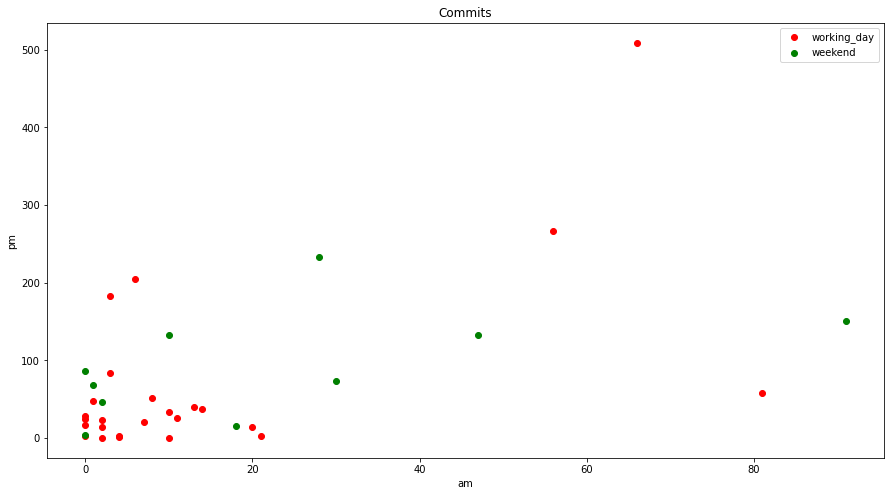

In [234]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
ax.legend()
ax.set_title('Commits')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

 it is
not easy

In [235]:
X = df_tab[['am', 'pm']].values
y = df_tab['target'].values
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [236]:
pred = logreg.predict(X)
df_tab['predict'] = pred
df_tab.to_csv('../data/am_pm.csv')
df_tab

,date,am,pm,target,predict
0,2020-04-17,21.0,2.0,working_day,weekend
23,2020-04-18,1.0,68.0,weekend,working_day
92,2020-04-19,18.0,15.0,weekend,working_day
125,2020-04-20,2.0,23.0,working_day,working_day
150,2020-04-21,0.0,25.0,working_day,working_day
175,2020-04-22,0.0,28.0,working_day,working_day
203,2020-04-23,10.0,33.0,working_day,working_day
246,2020-04-24,2.0,14.0,working_day,working_day
262,2020-04-25,30.0,74.0,weekend,working_day
366,2020-04-26,28.0,233.0,weekend,working_day


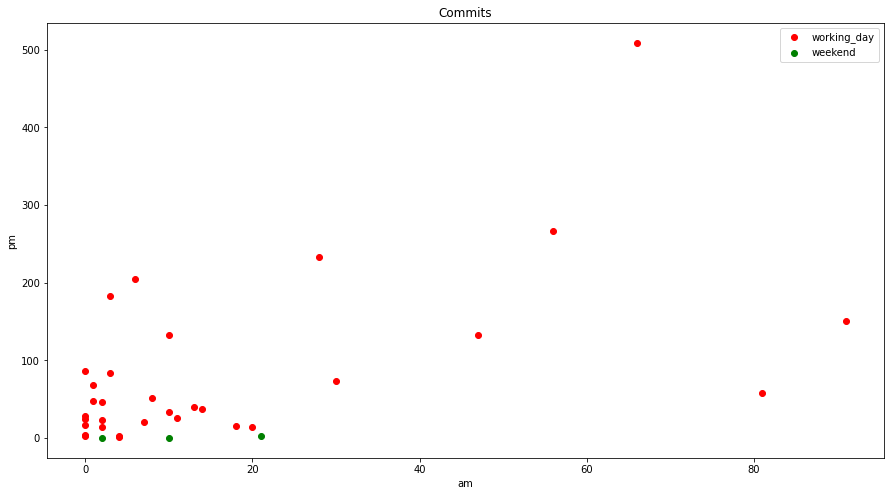

In [237]:
ds1 = df_tab[df_tab.predict == 'working_day']
ds2 = df_tab[df_tab.predict == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
ax.legend()
ax.set_title('Commits')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

no, it is not good

In [238]:
accuracy_score(y, pred)

0.6285714285714286

In [239]:
accuracy_score(y, [df['target'].max()] * len(y))

0.7142857142857143

no, it is not good